# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [289]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from panel.interact import interact
from panel import widgets
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
pn.extension("plotly")
import warnings
warnings.filterwarnings('ignore')

In [290]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [291]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [292]:
#sfo_data.info()
# Calculate the mean number of housing units per year (hint: use groupby) 

sfo_1 = sfo_data.groupby('year')['housing_units'].mean()

sfo_1


#sfo = sfo_data.groupby(["year", "housing_units"]).mean()
#sfo.drop(sfo.columns[[1, 2]], axis = 0)
#sfo
#sfo.drop(columns = ["], inplace=True)

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [293]:
# Save the dataframe as a csv file
sfo_data.to_csv()

'year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent\n2010,Alamo Square,291.18294547229095,372560,1239\n2010,Anza Vista,267.9325826799483,372560,1239\n2010,Bayview,170.09866536400102,372560,1239\n2010,Buena Vista Park,347.3949194037114,372560,1239\n2010,Central Richmond,319.0276225530687,372560,1239\n2010,Central Sunset,418.1724927089675,372560,1239\n2010,Corona Heights,369.35933800413665,372560,1239\n2010,Cow Hollow,569.3799679261333,372560,1239\n2010,Croker Amazon,165.6457300650791,372560,1239\n2010,Diamond Heights,456.9308221979013,372560,1239\n2010,Downtown ,241.80455206485138,372560,1239\n2010,Eureka Valley/Dolores Heights,403.1183126490986,372560,1239\n2010,Excelsior,364.92833570851764,372560,1239\n2010,Financial District North,401.7499665916537,372560,1239\n2010,Financial District South,162.82121004772353,372560,1239\n2010,Forest Knolls,209.0493266346945,372560,1239\n2010,Glen Park,715.5864380979738,372560,1239\n2010,Golden Gate Heights,551.8011188234774,372560,1239\n

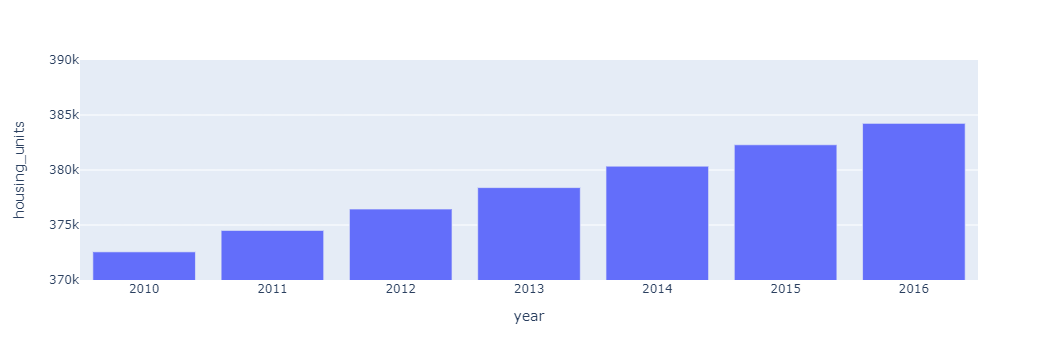

In [294]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

fig = px.bar(sfo_1, y = "housing_units")
fig.update_layout(yaxis_range=[370000,390000])
fig.show()



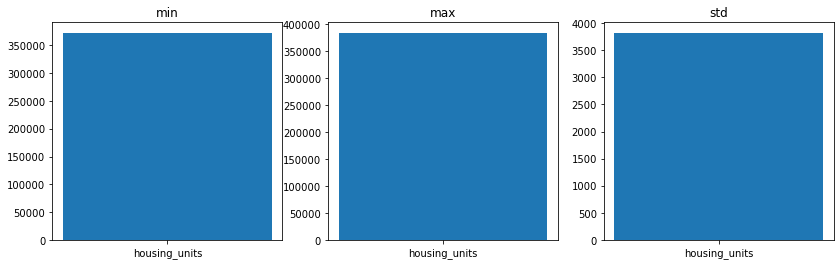

In [295]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart


fig, axs = plt.subplots(1, 3, figsize = (14, 4))

for col in sfo_data[["housing_units"]]:
   axs[0].set_title("min")
   axs[0].bar([col], sfo_data[col].min())
    
   axs[1].set_title("max")
   axs[1].bar([col], sfo_data[col].max())
    
   axs[2].set_title("std")
   axs[2].bar([col], sfo_data[col].std())

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [296]:
# Calculate the average sale price per square foot and average gross rent
sfo_1 = sfo_data.groupby('year').mean()[['gross_rent', 'sale_price_sqr_foot']]
sfo_1


,gross_rent,sale_price_sqr_foot
year,,
2010,1239,369.344353
2011,1530,341.903429
2012,2324,399.389968
2013,2971,483.600304
2014,3528,556.277273
2015,3739,632.540352
2016,4390,697.643709


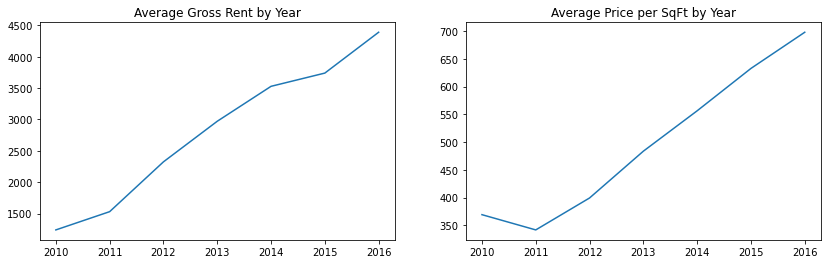

In [297]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

fig, axs = plt.subplots(1, 2, figsize = (14, 4))

# Line chart for average sale price per square foot
axs[0].set_title("Average Gross Rent by Year")
axs[0].plot( list(sfo_1.index), sfo_1["gross_rent"])
    
axs[1].set_title("Average Price per SqFt by Year")
axs[1].plot( list(sfo_1.index), sfo_1["sale_price_sqr_foot"])
plt.show()

# Line chart for average montly rent
# YOUR CODE HERE!

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [298]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_2 = sfo_data.groupby(['neighborhood', 'year']).mean()
sfo_2


sale_price_sqr_foot  housing_units  gross_rent
neighborhood year                                                
Alamo Square 2010           291.182945         372560        1239
             2011           272.527310         374507        1530
             2012           183.099317         376454        2324
             2013           387.794144         378401        2971
             2014           484.443552         380348        3528
...                                ...            ...         ...
Yerba Buena  2011           438.860545         374507        1530
             2012           491.814003         376454        2324
             2013           753.011413         378401        2971
             2014           479.923749         380348        3528
             2015           963.522606         382295        3739

[397 rows x 3 columns]

In [299]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

sfo_2.hvplot(x='year', y='sale_price_sqr_foot', groupby='neighborhood', label='Average Sale Price per Square Foot')
# YOUR CODE HERE!
######## Plot out with dropdown panel

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [300]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_2.hvplot(x='year', y='gross_rent', groupby='neighborhood', label='Average Monthly Rent')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [301]:
# Getting the data from the top 10 expensive neighborhoods to own
#sfo_4 = sfo_data.groupby('neighborhood')['sale_price_sqr_foot'].mean()
#sfo_4.sort_values(by=['sale_price_sqr_foot'], ascending=True)


sfo_4 = sfo_data.groupby('neighborhood').mean()[['sale_price_sqr_foot']]
sfo_5 = sfo_4.sort_values(by=['sale_price_sqr_foot'], ascending=False).head(10)
sfo_5

,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


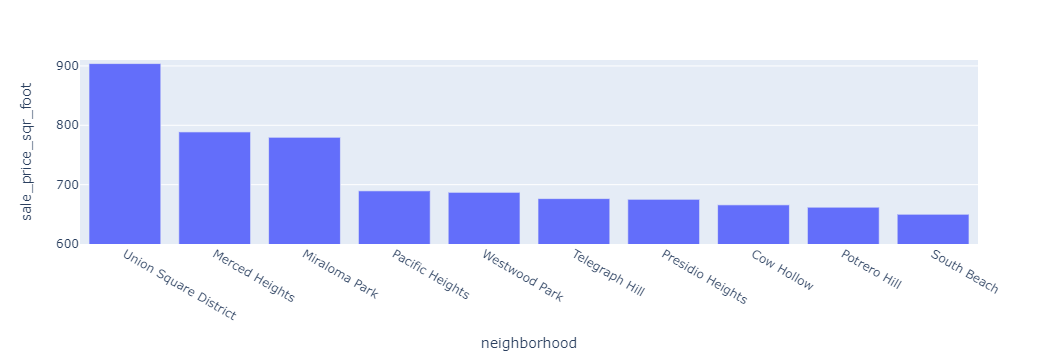

In [302]:
# Plotting the data from the top 10 expensive neighborhoods
fig = px.bar(sfo_5, y = "sale_price_sqr_foot")
fig.update_layout(yaxis_range=[600,910])
fig.show()


- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [303]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_6 = sfo_2[['gross_rent', 'sale_price_sqr_foot']]
sfo_7 = sfo_6.sort_values(by=['sale_price_sqr_foot'], ascending=False).head(10)
sfo_7.iloc[:10]
sfo_7

,,gross_rent,sale_price_sqr_foot
neighborhood,year,,
Union Square District,2015,3739,2258.702832
Presidio Heights,2016,4390,1465.968586
Merced Heights,2016,4390,1416.666667
Union Square District,2013,2971,1290.472107
Miraloma Park,2014,3528,1267.766203
Parnassus/Ashbury Heights,2016,4390,1207.997485
Outer Richmond,2016,4390,1196.645437
Marina,2015,3739,1132.837361
South of Market,2014,3528,1119.838877


In [304]:
# Plotting the data from the top 10 expensive neighborhoods

sfo_7.hvplot(x='year', y='sale_price_sqr_foot', groupby='neighborhood', label='Average Sale Price per Square Foot')
   


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [305]:
sfo_7.hvplot(x='year', y='gross_rent', groupby='neighborhood', label='Average Monthly Rent')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [306]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhood_coordinates.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/neighborhood_coordinates.csv'

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

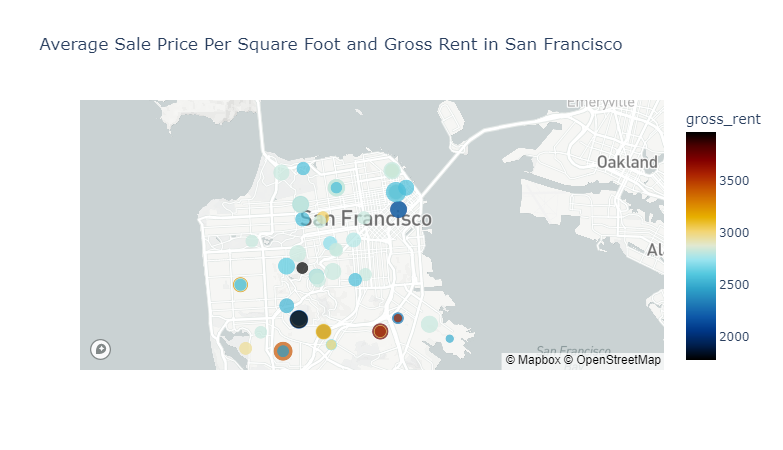

In [19]:
# Set the mapbox access token
# YOUR CODE HERE!

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


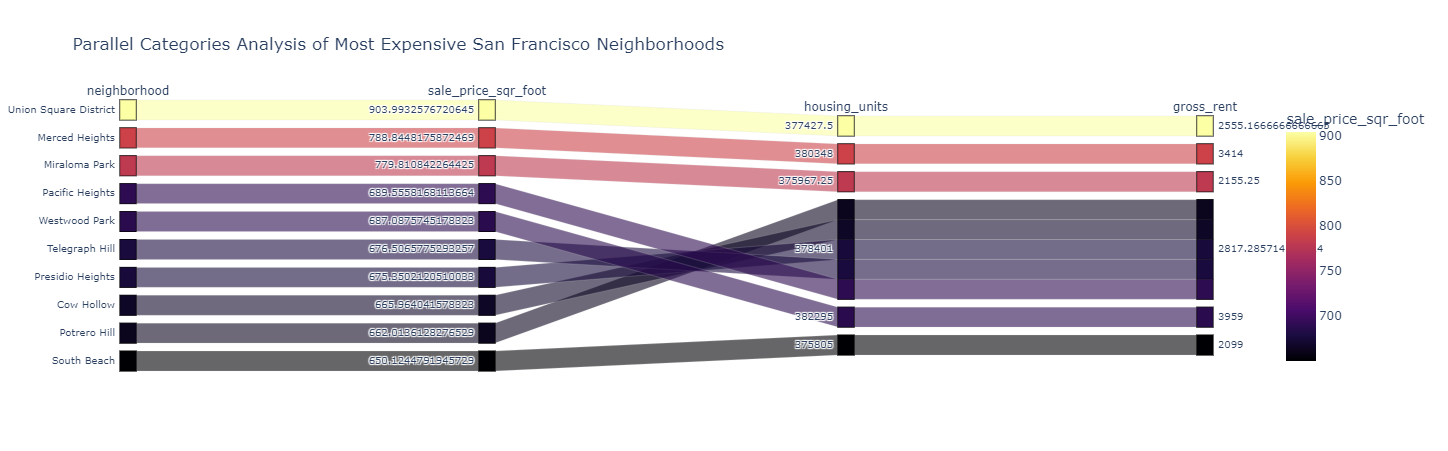

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

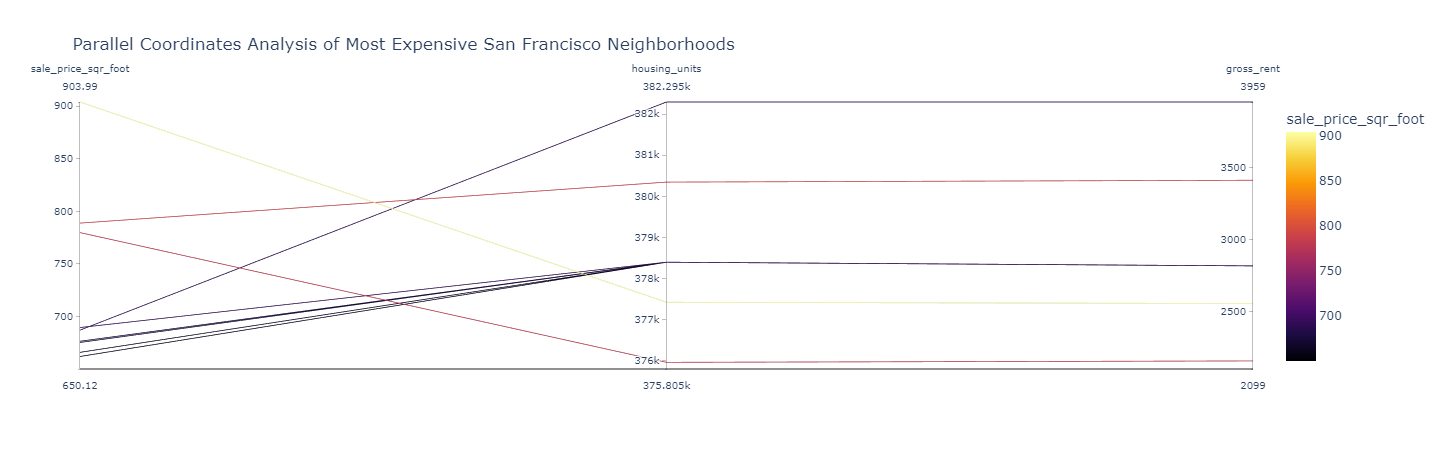

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

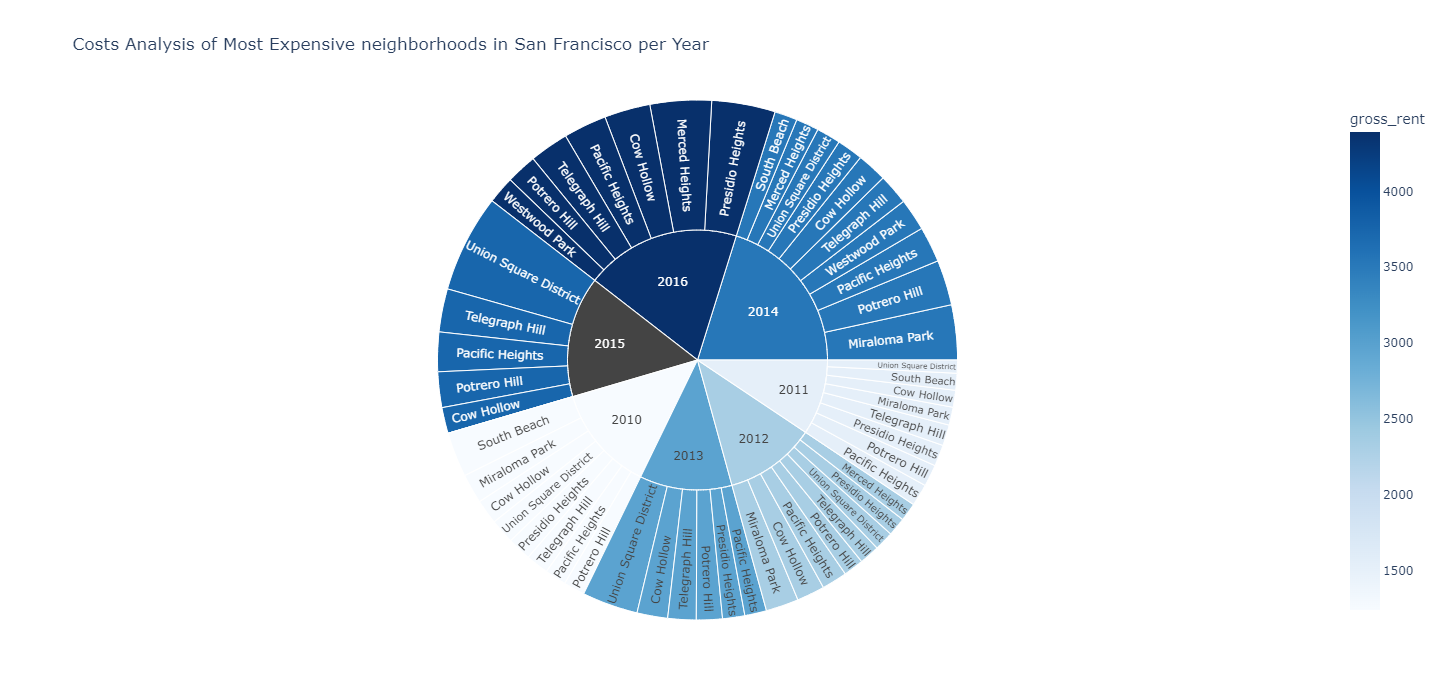

In [23]:
# Sunburst Plot
# YOUR CODE HERE!